In [35]:
import os 
cwd = os.getcwd()
import sys
sys.path.append("C:/Users/gomel/Documents/global_python_codes/Metrics_thresholds_boots") # go to parent dir
import sympy as sp
import ewstools as ews
import numpy as np
import sdeint
import metrics
import boots as bts
import scipy.stats as st
import astropy.stats as astrost
import scipy.signal as sg

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif"
})

try:
    os.mkdir('./skipping')
except: print('Folder exists')

try:
    os.mkdir('./skipping/hist')
except: print('Folder exists')

try:
    os.mkdir('./skipping/lags')
except: print('Folder exists')


Folder exists
Folder exists
Folder exists


This is a simulation of a onlinear equation with aditive noise using a Heun method where the noise only applies on the variable and not the parameter. 

\begin{equation}
\dot{x}=\lambda x-x^3
\end{equation}

where $x$ is a random variable and $\lambda$ is a swiped parameter determined by $\dot{\lambda}=\lambda$.  


This system has three fixed points, $x^*={0}$.

In this case, the initial condition is always around the same point, but stil, i'll use the last value the previous integration and wait $t=2t^*$ 


0.011363636363636364
$\Delta t= $ 0.011363636363636364 t_final: 240.0
data length:  21120
lambda:  -1.1
lambda:  -0.9535060361560508
lambda:  -0.8265216008963854
lambda:  -0.7164484867891507
lambda:  -0.6210345061348398
lambda:  -0.5383274093279652
lambda:  -0.4666349402022399
lambda:  -0.4044902110583214
lambda:  -0.3506216889183131
lambda:  -0.30392717890076415
lambda:  -0.263451272394326
lambda:  -0.22836579860089248
lambda:  -0.19795287947049817
lambda:  -0.17159024131781017
lambda:  -0.14873848258364122
lambda:  -0.12893003722926683
lambda:  -0.11175960794539115
lambda:  -0.09687587343124017
lambda:  -0.08397430006779735


C:\Users\gomel\AppData\Local\Temp\ipykernel_30196\1073713319.py:161: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(20,10))


lambda:  -0.07279091090602202


C:\Users\gomel\AppData\Local\Temp\ipykernel_30196\1073713319.py:147: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(20,10))


lambda:  -0.06309688447835392
lambda:  -0.054693872920683166
lambda:  -0.047409943609657605
lambda:  -0.04109606127784228
lambda:  -0.035623038627874144
lambda:  -0.03087889305263469
lambda:  -0.026766555377731194
lambda:  -0.023201883745247176
lambda:  -0.0201119420011674
lambda:  -0.017433507360848643
lambda:  -0.015111776818127393
lambda:  -0.013099245830115958
lambda:  -0.011354736334643215
lambda:  -0.00984255421276612
lambda:  -0.008531758957332424
lambda:  -0.007395530604404475
lambda:  -0.0064106209744331545
lambda:  -0.005556877995118722
lambda:  -0.00481683337320767
lambda:  -0.0041753451786467515
lambda:  -0.003619288028067945
lambda:  -0.0031372845285001037
lambda:  -0.0027194724864216726
lambda:  -0.0023573031190576087
lambda:  -0.0020433661391553765
lambda:  -0.0017712381343286687
lambda:  -0.0015353511386837892
lambda:  -0.0013308787075945994
lambda:  -0.0011536371646209214
lambda:  -0.0010000000000000007


ValueError: Data has no positive values, and therefore can not be log-scaled.

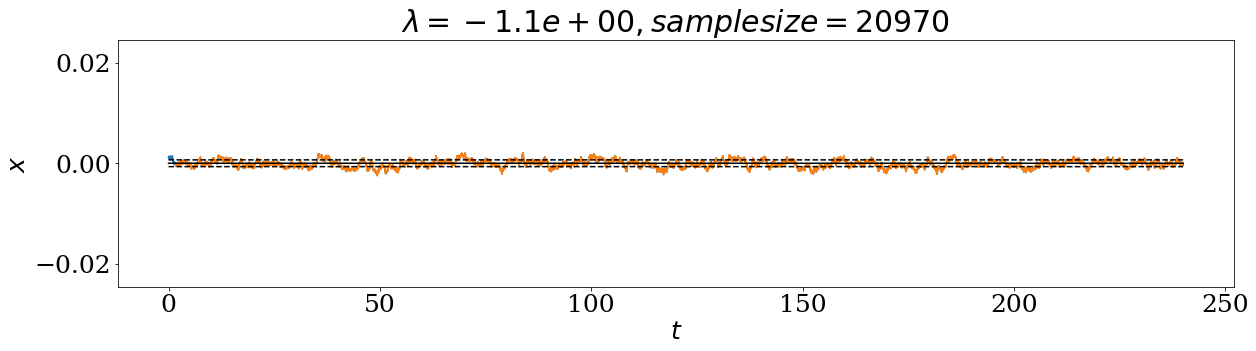

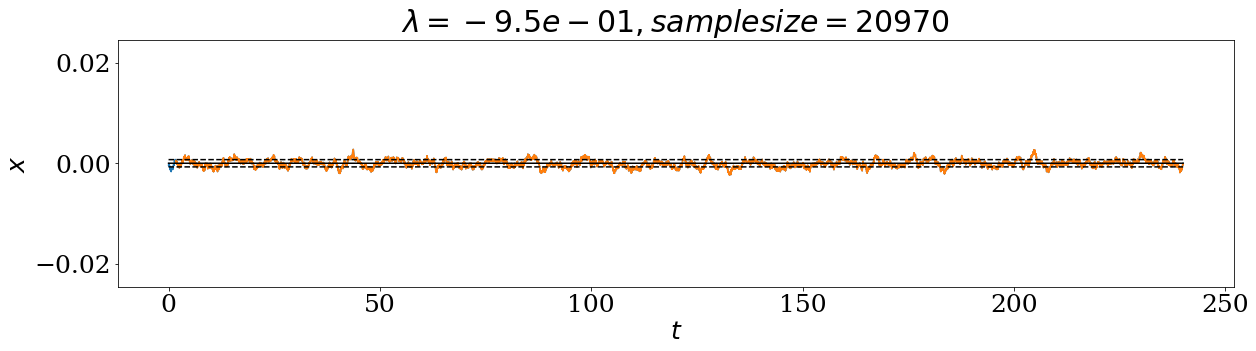

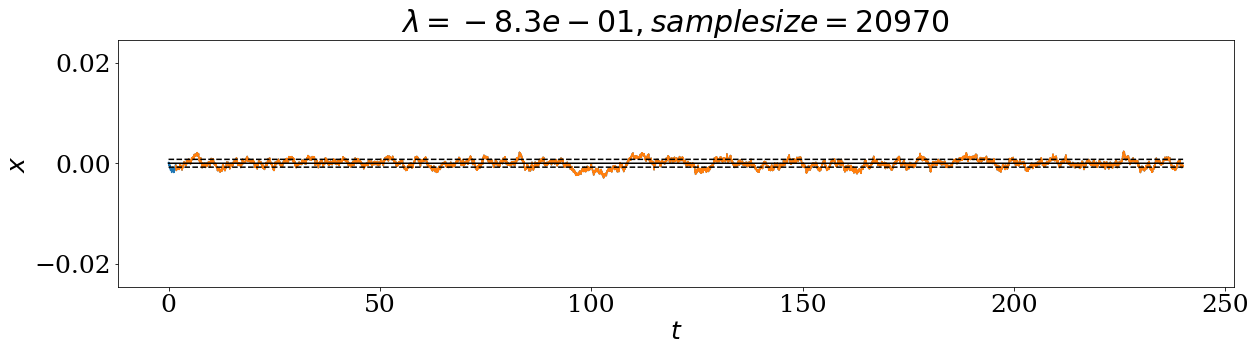

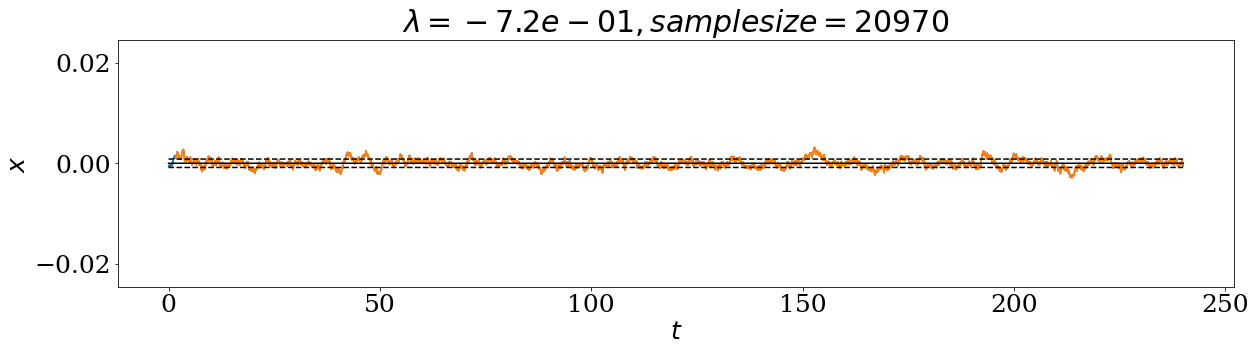

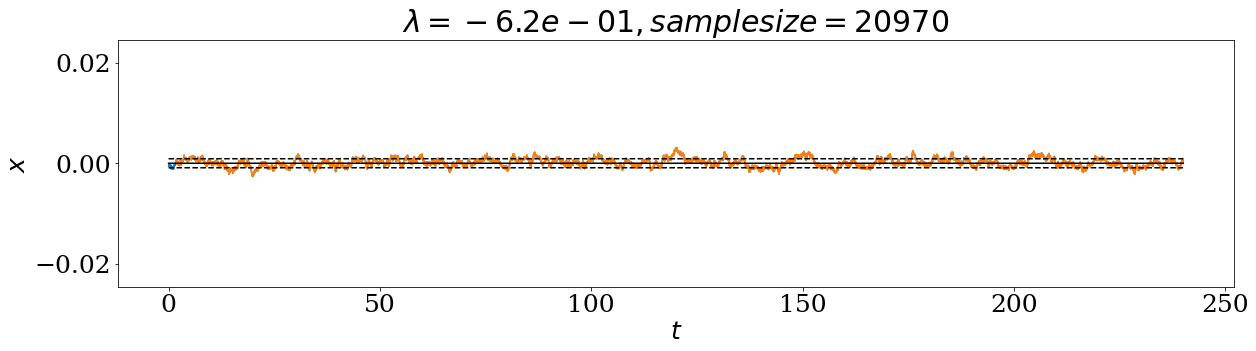

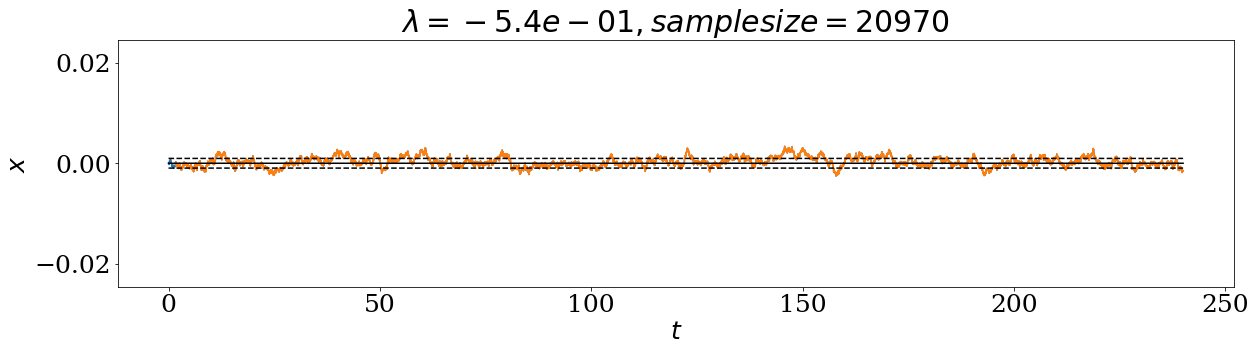

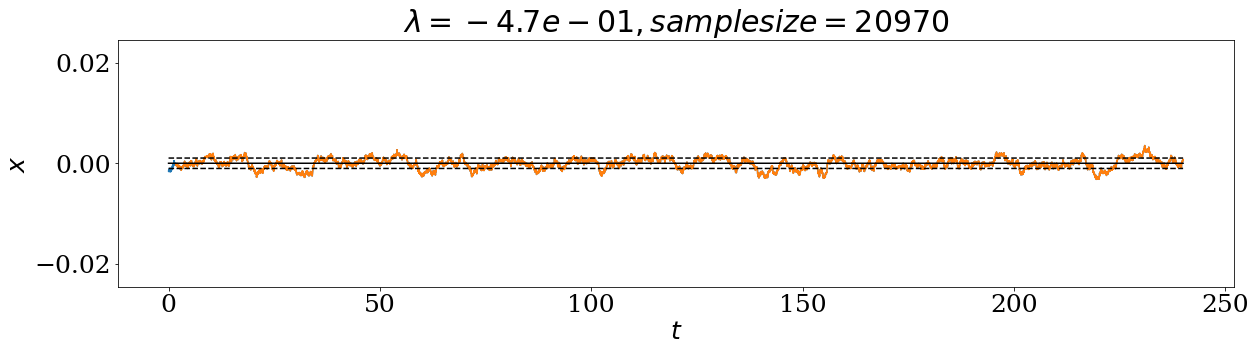

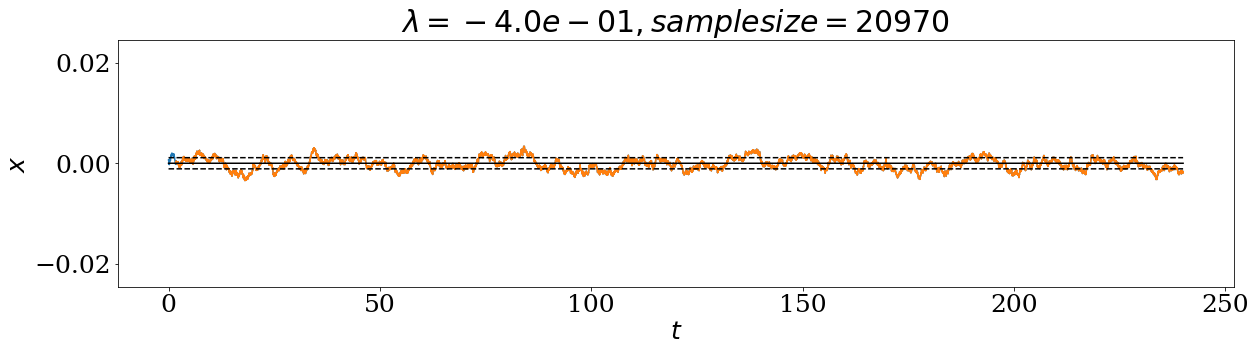

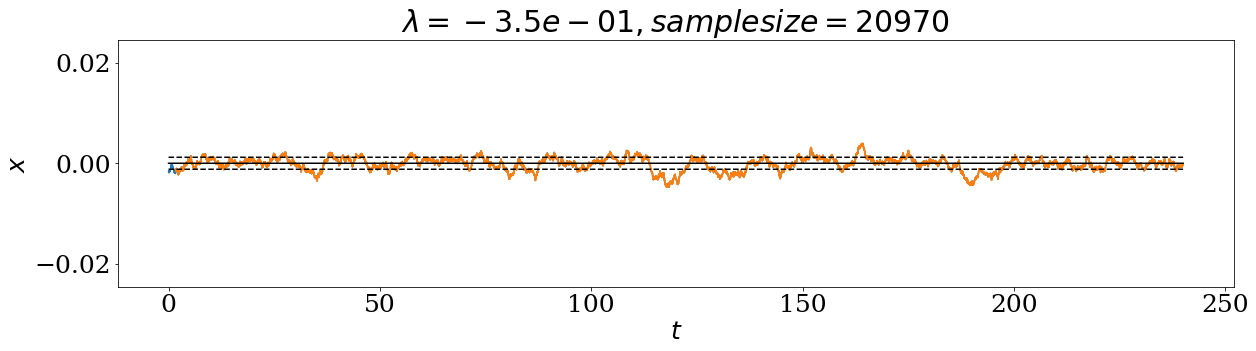

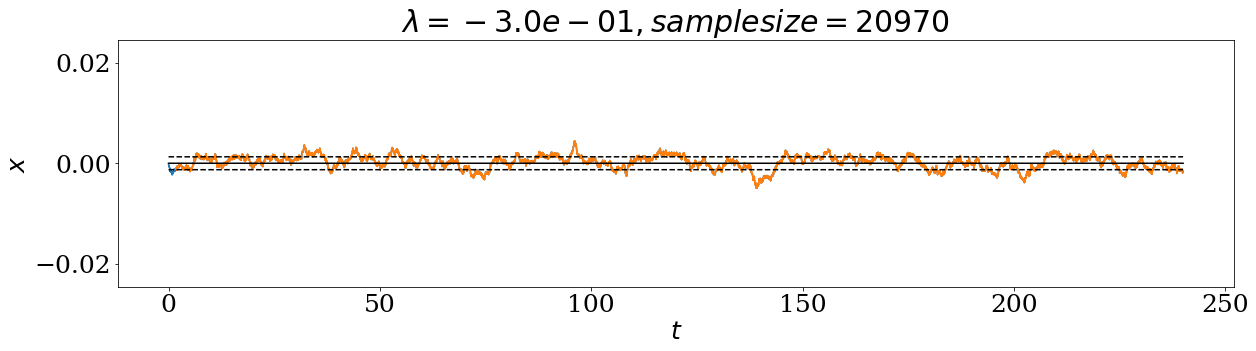

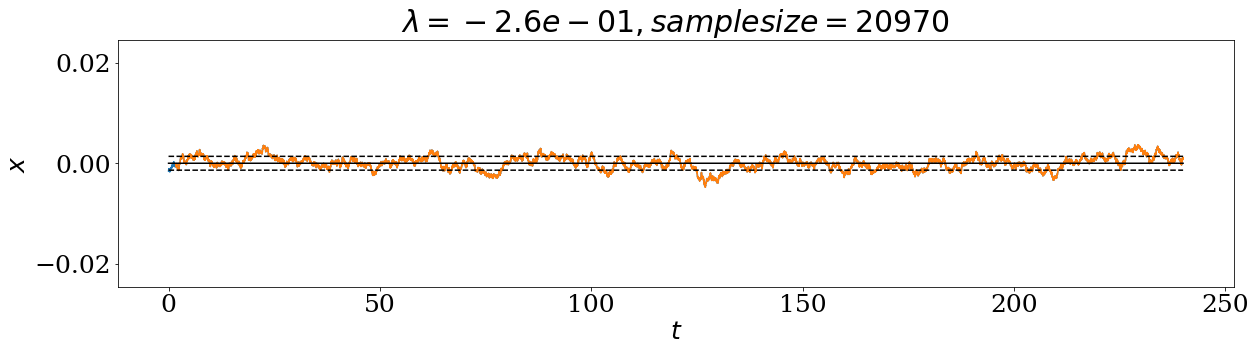

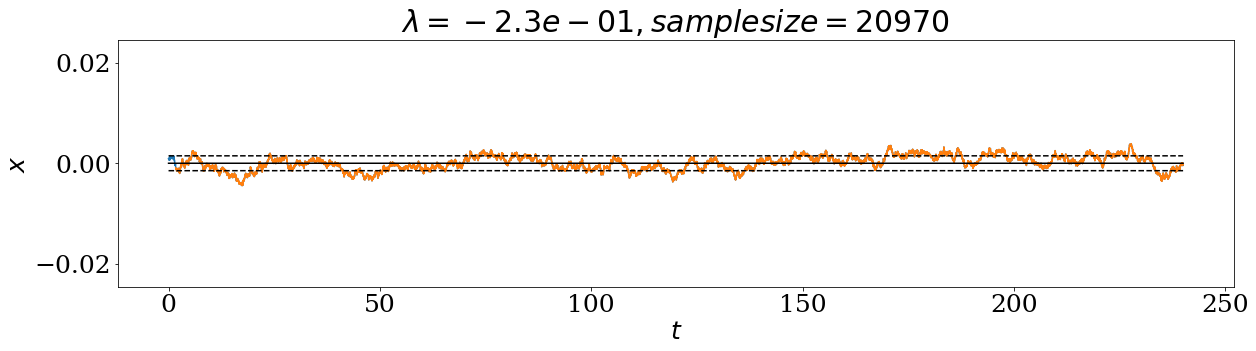

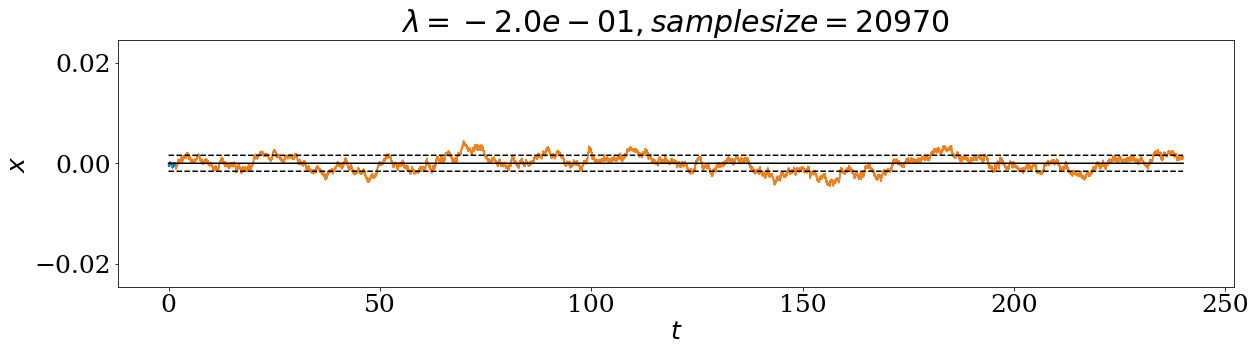

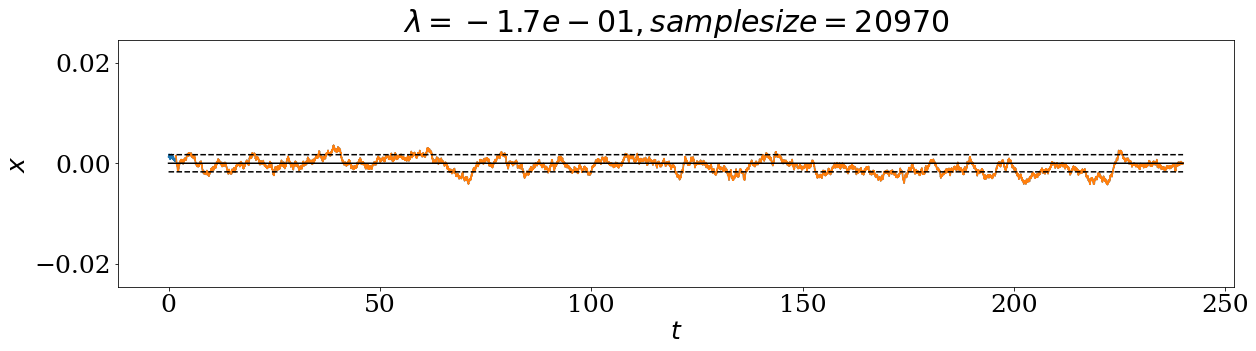

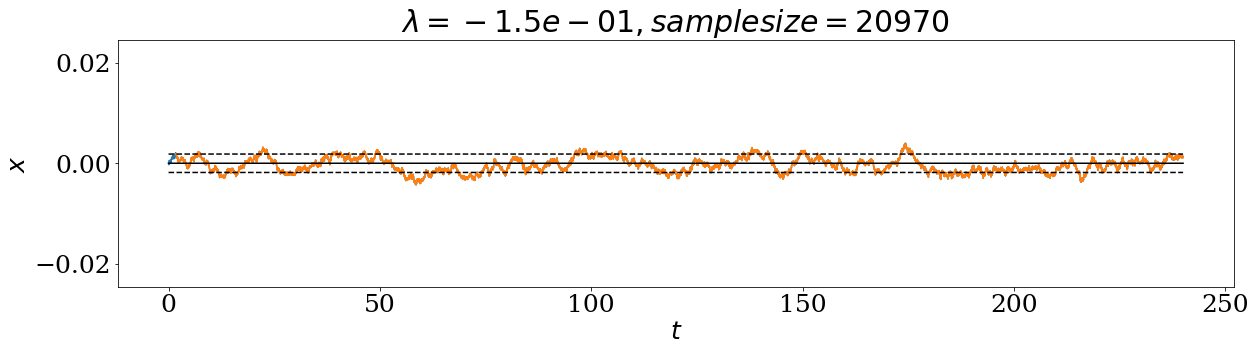

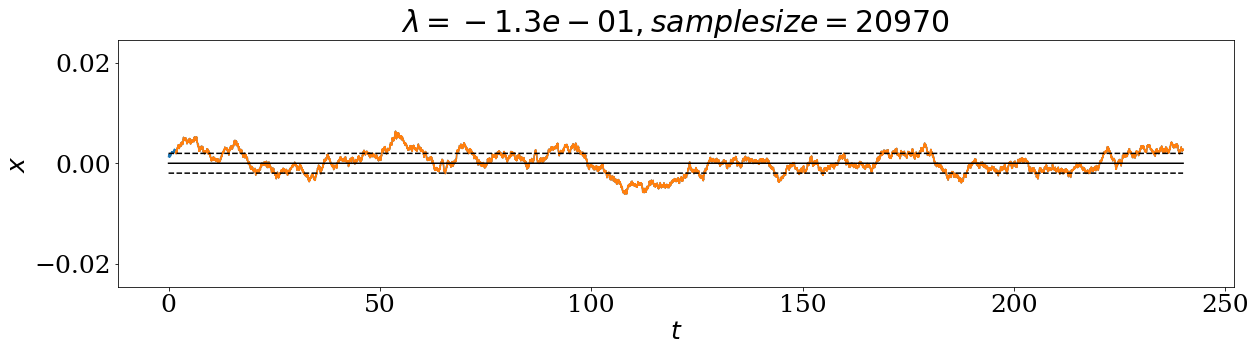

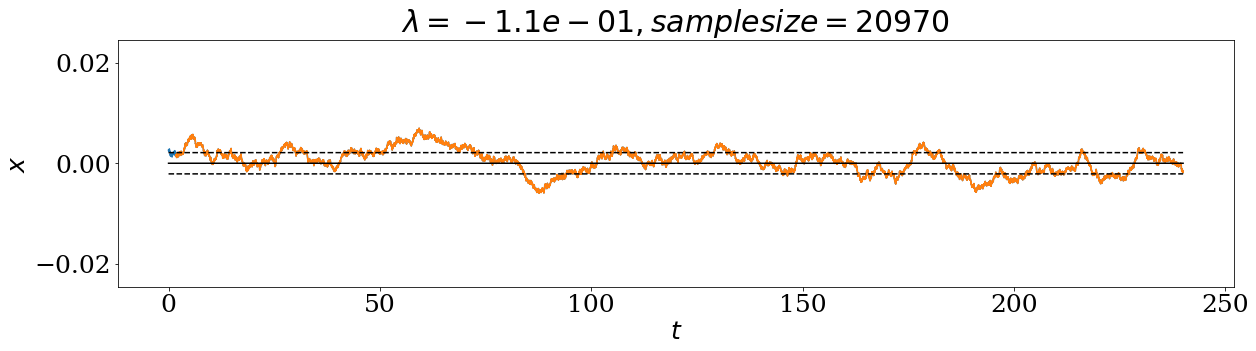

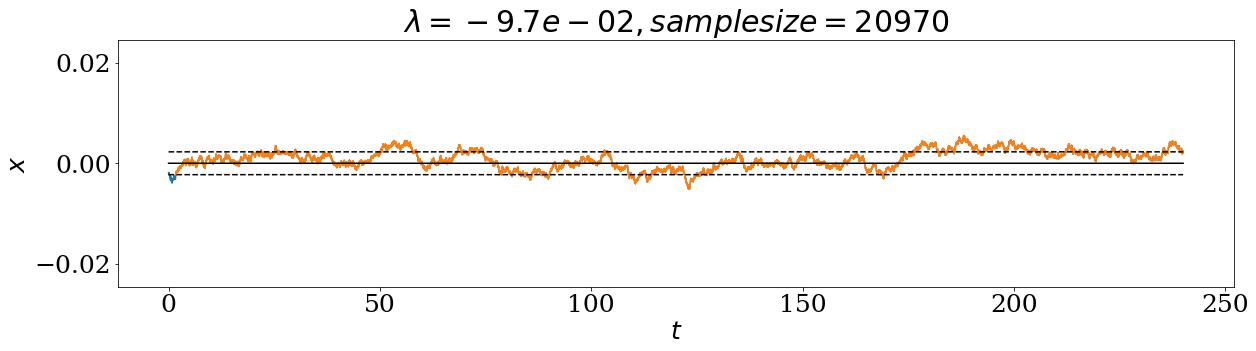

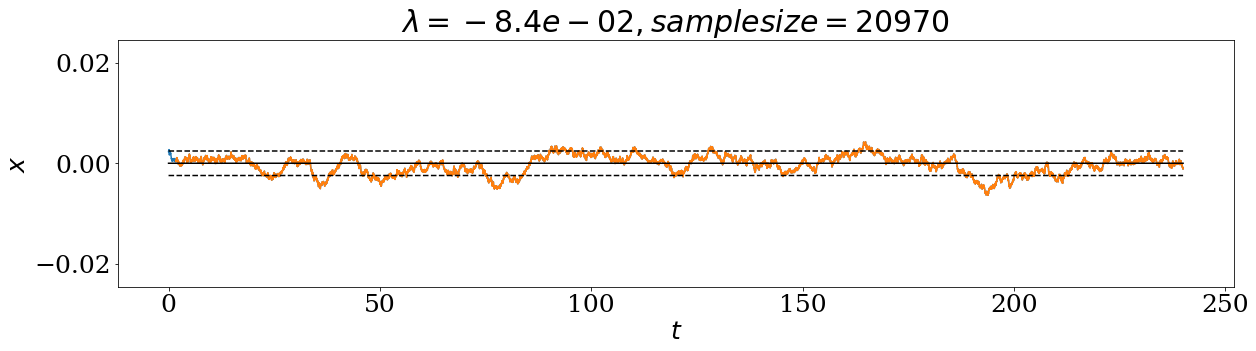

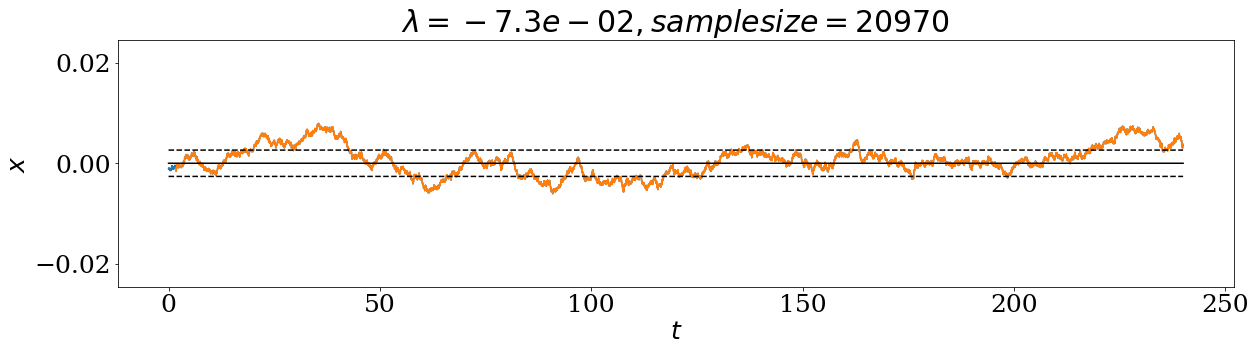

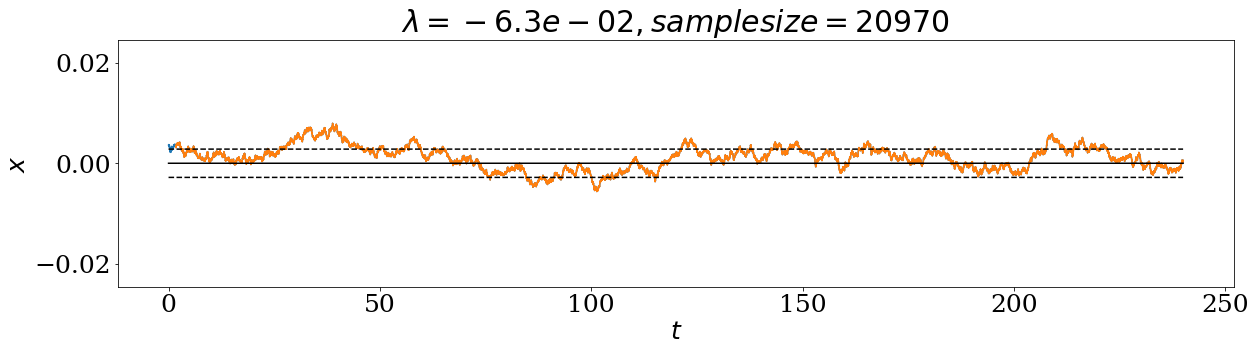

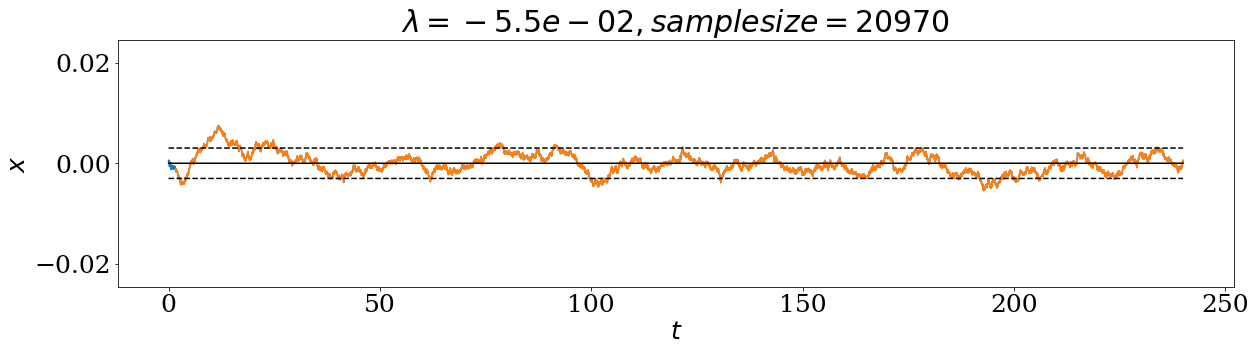

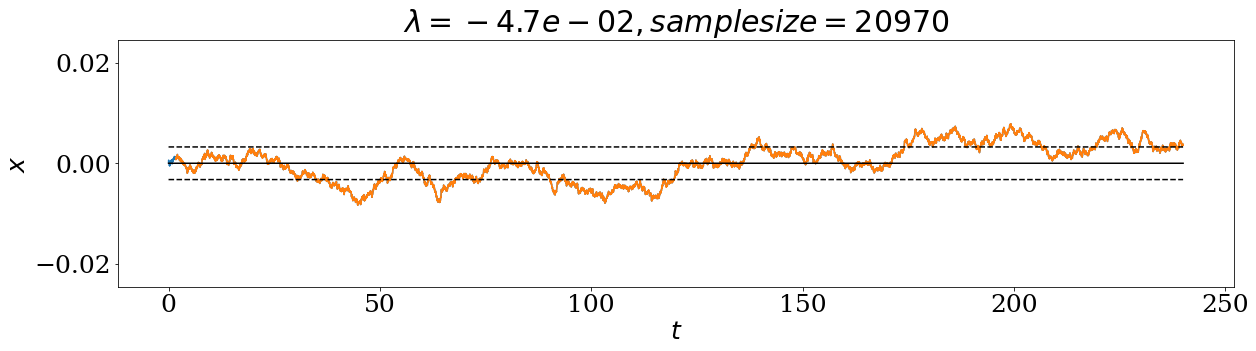

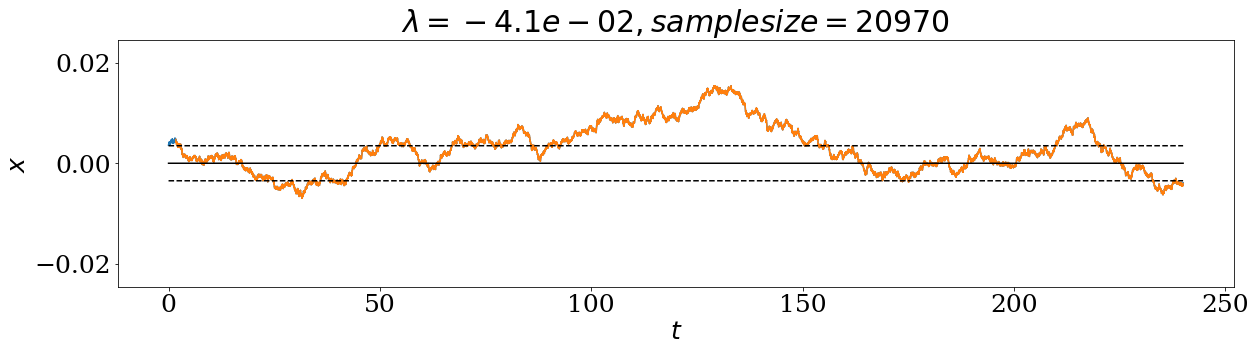

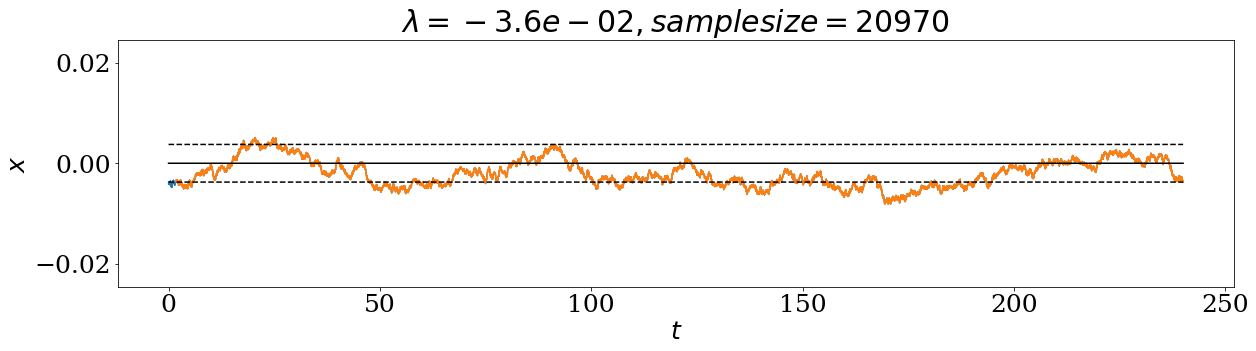

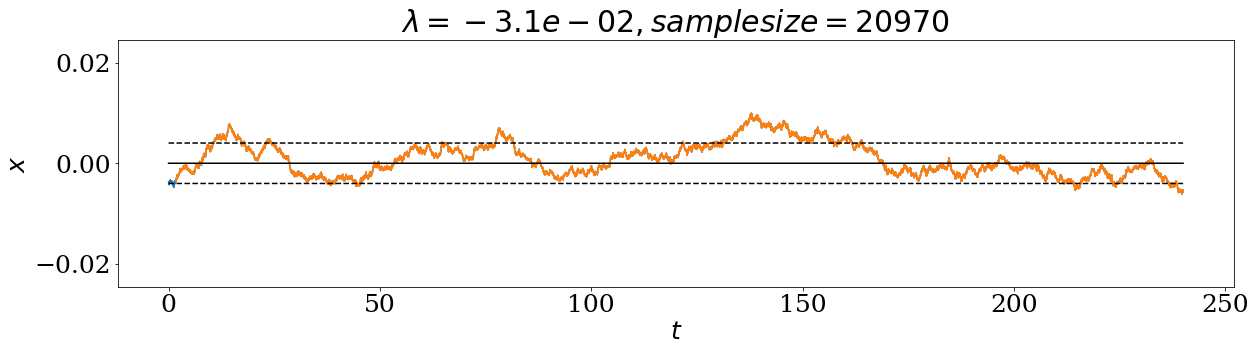

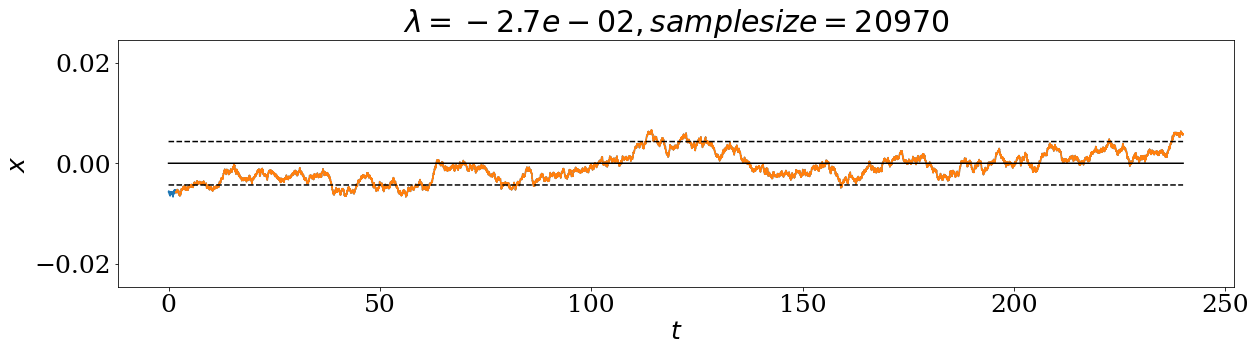

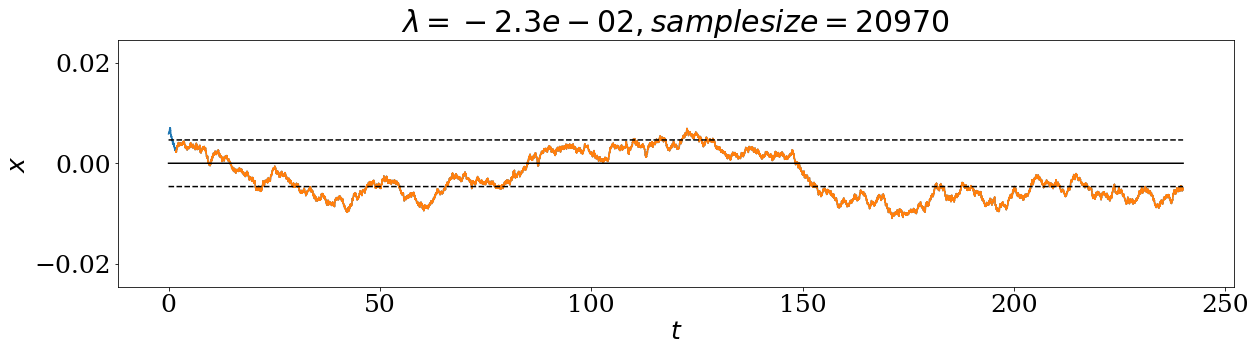

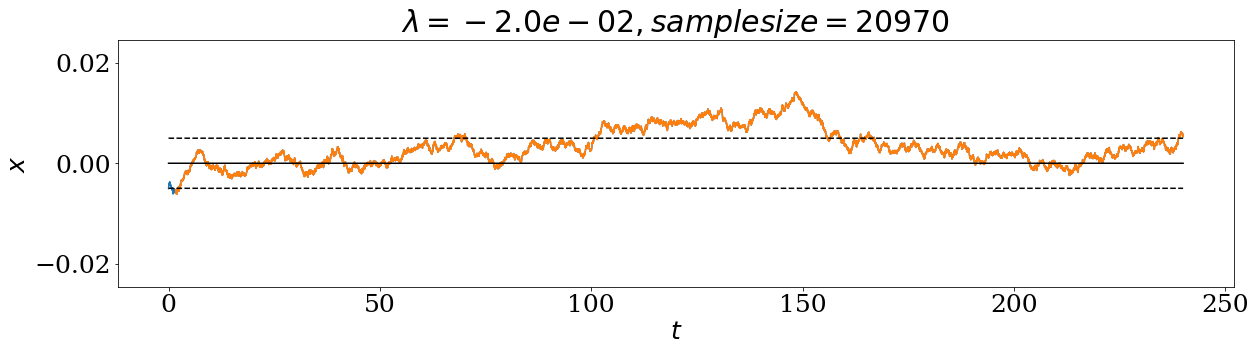

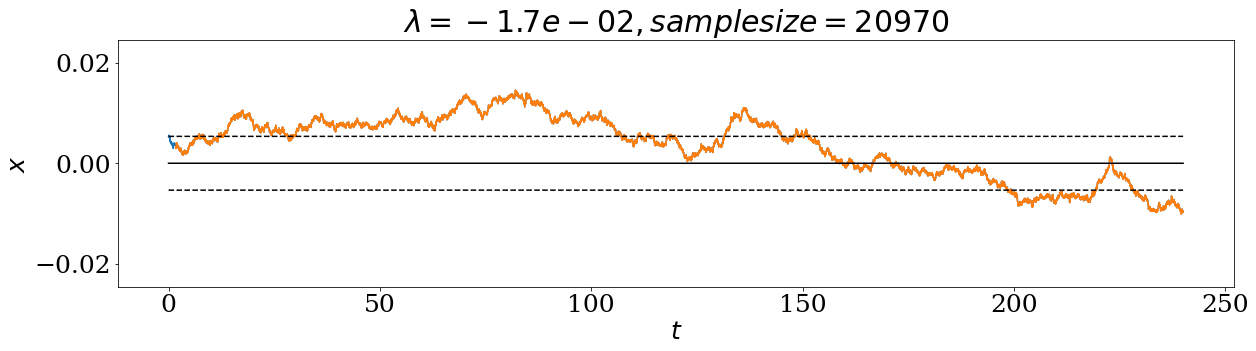

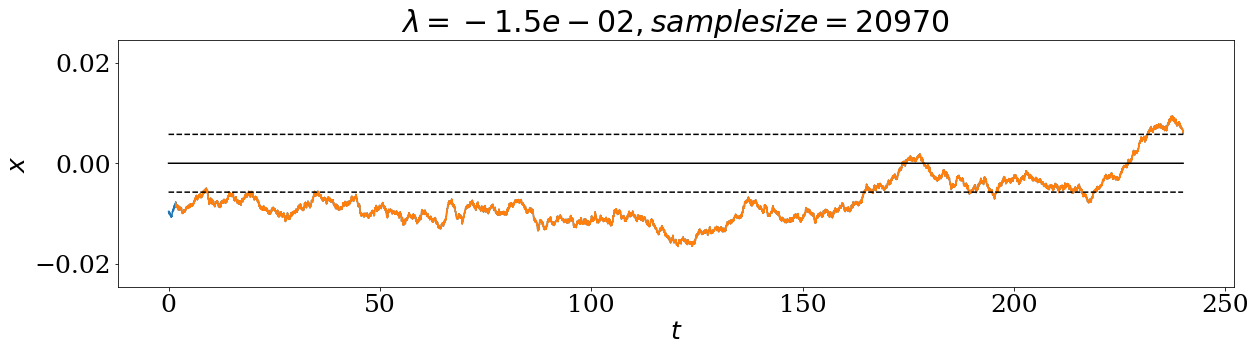

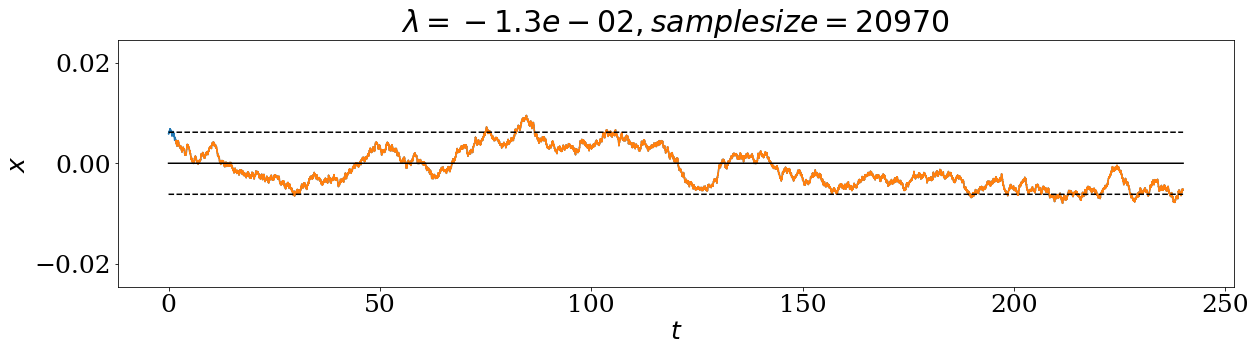

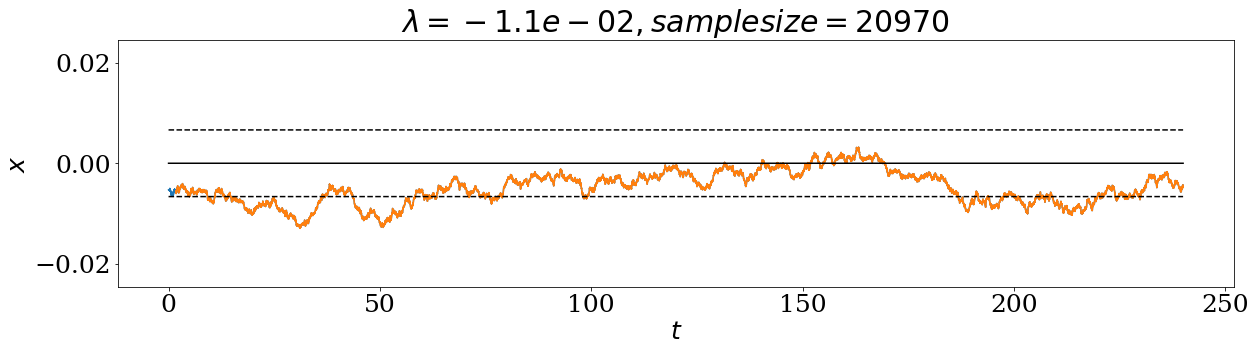

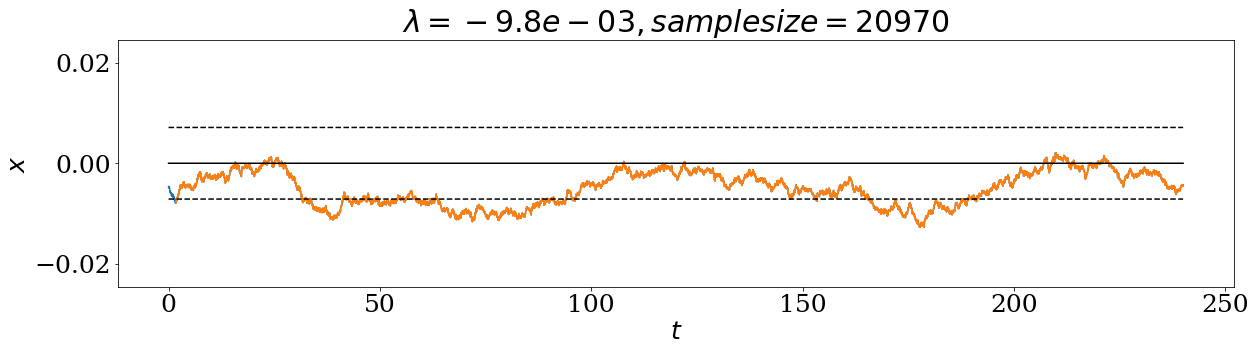

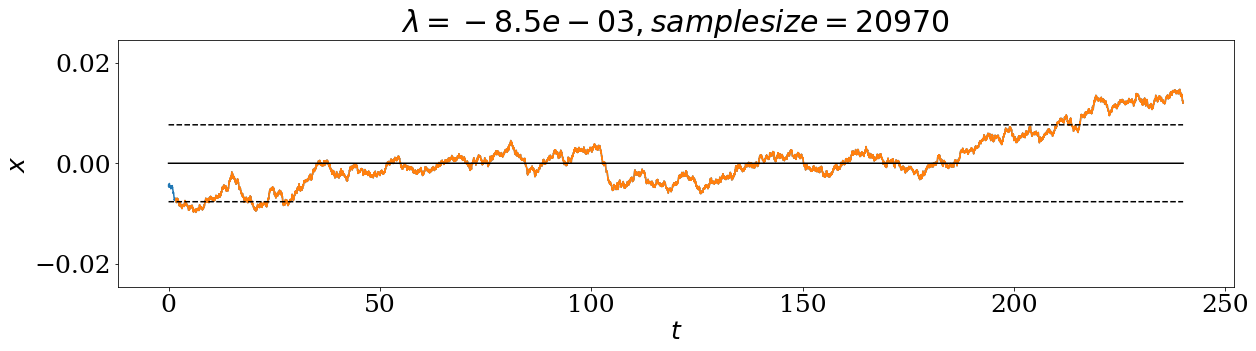

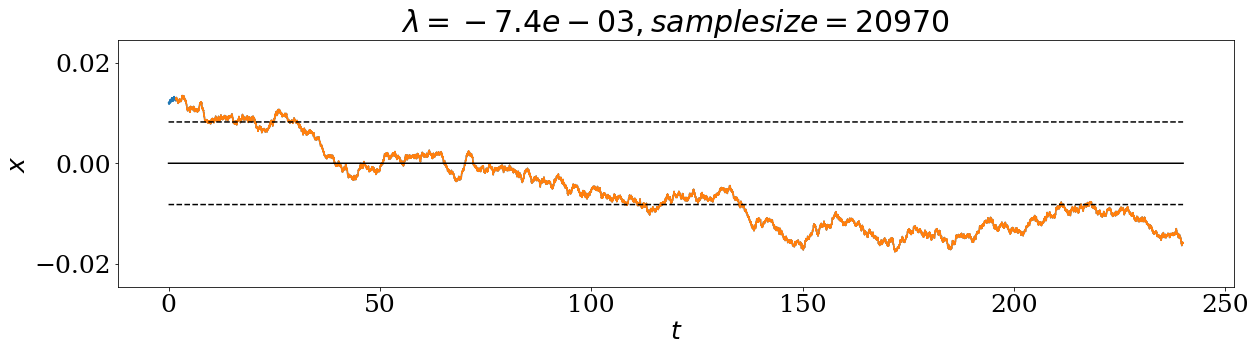

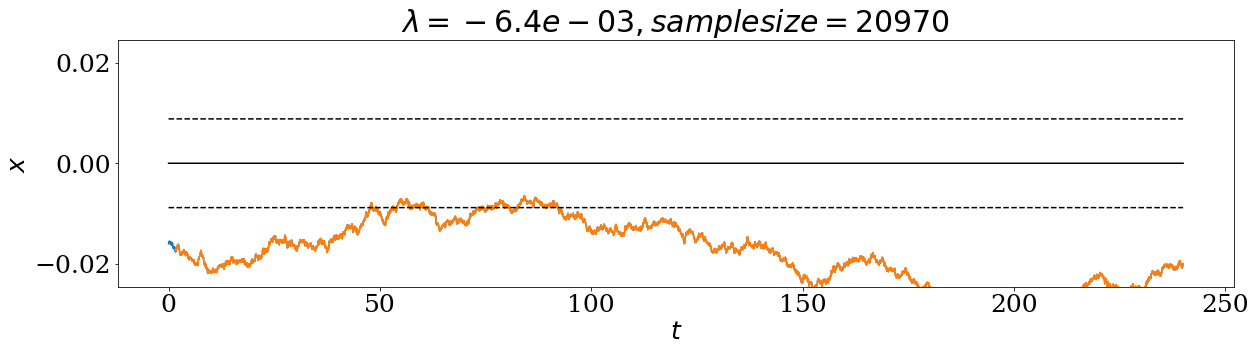

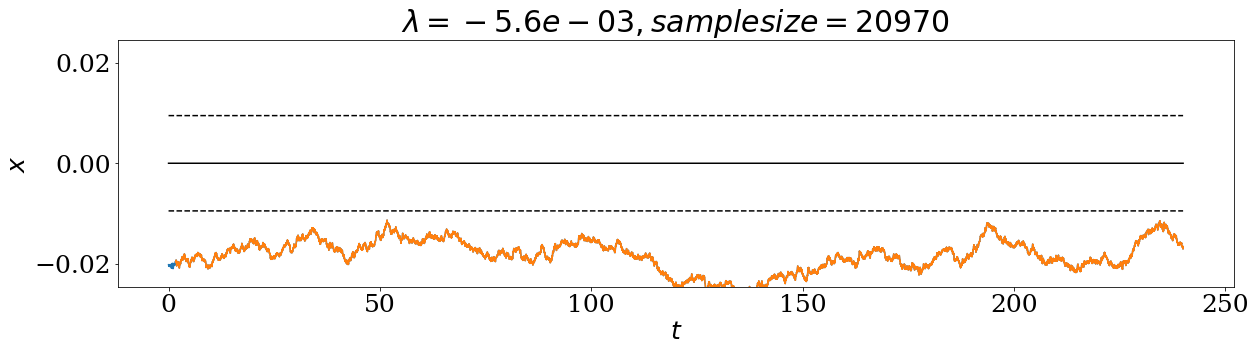

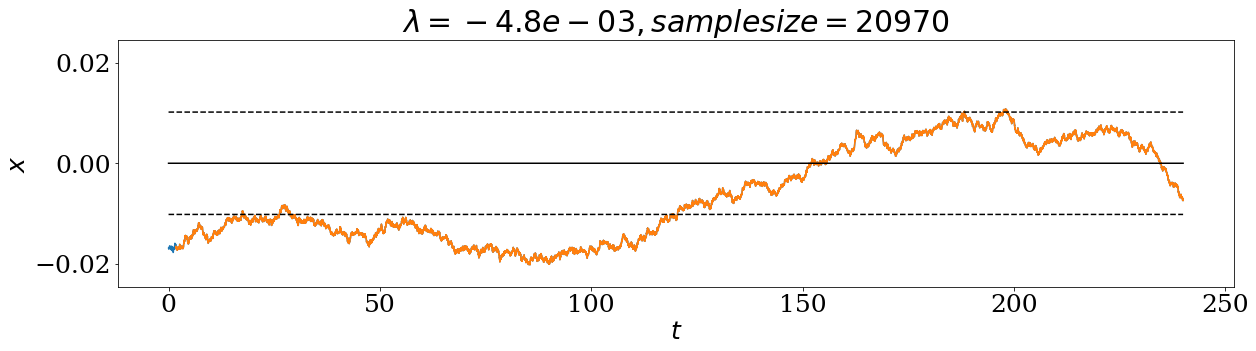

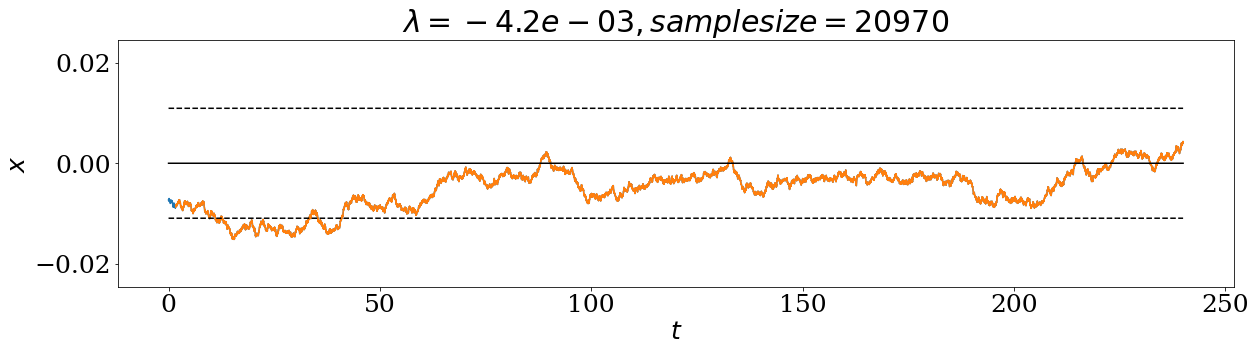

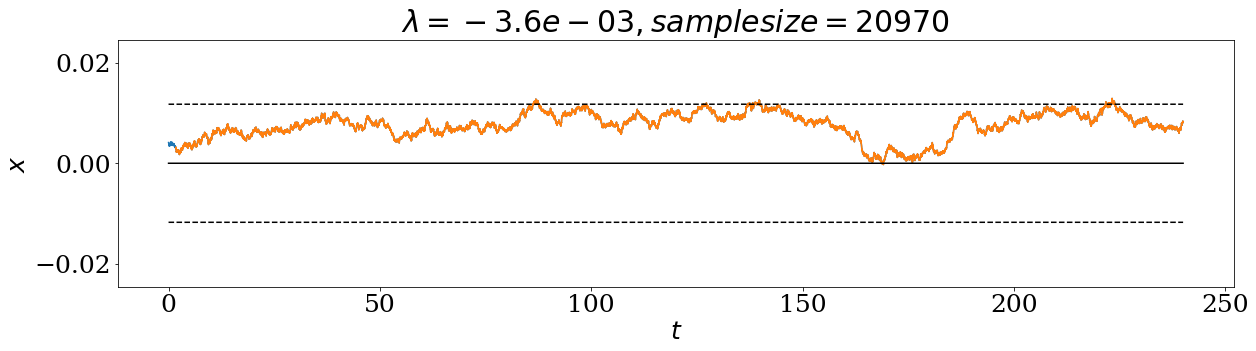

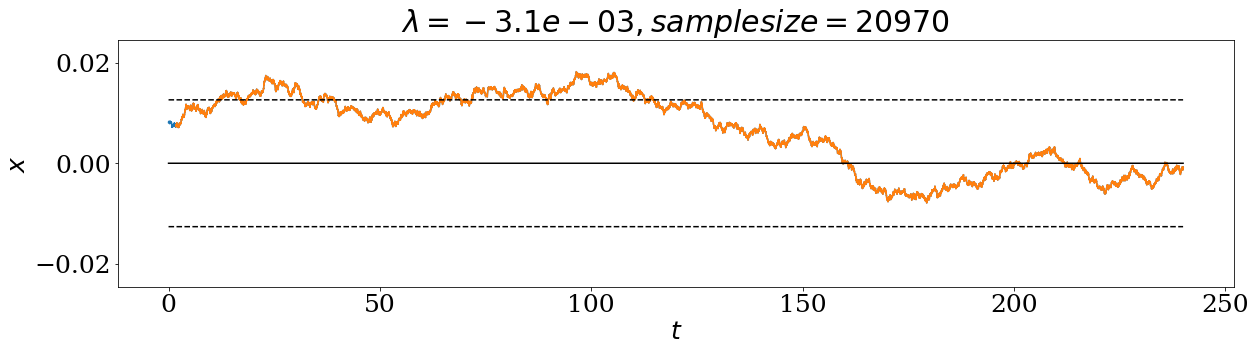

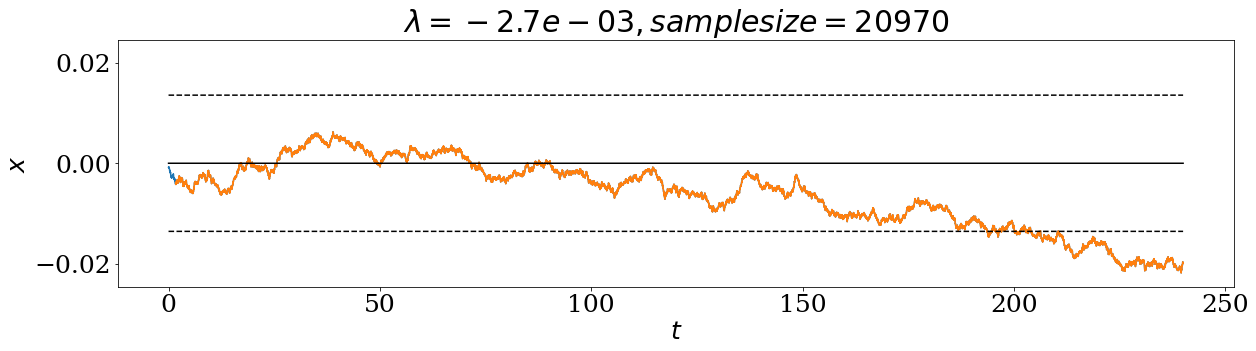

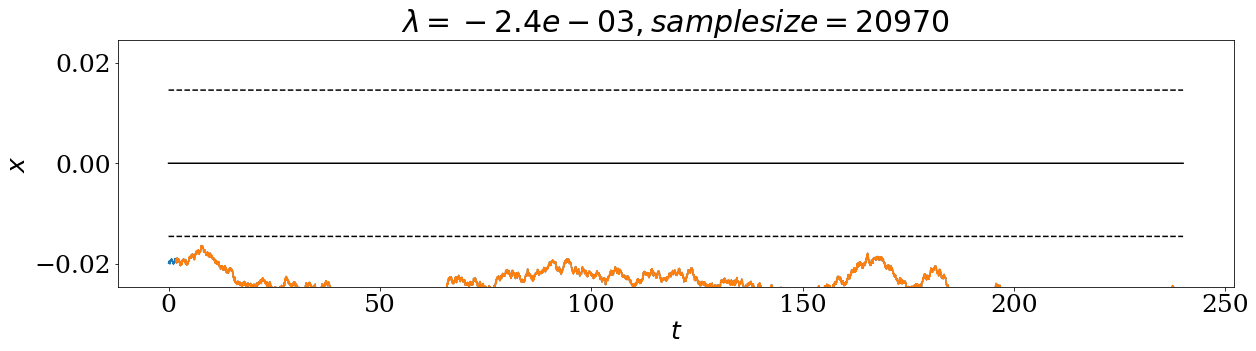

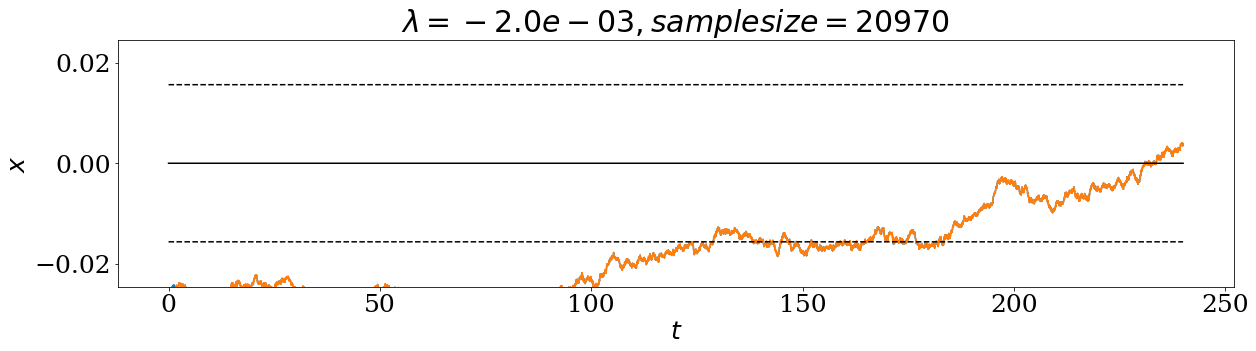

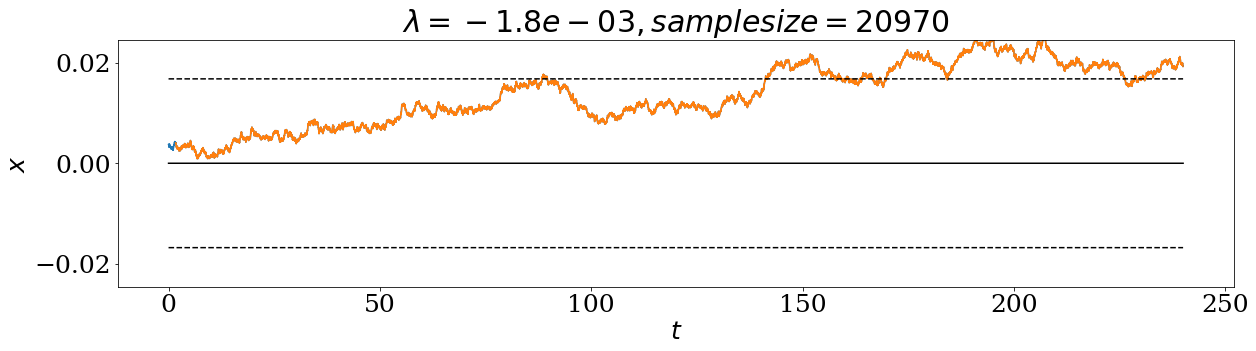

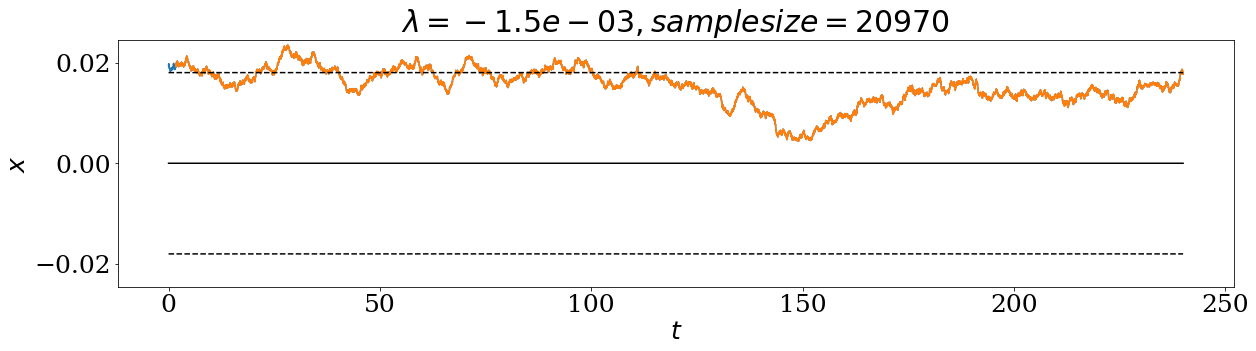

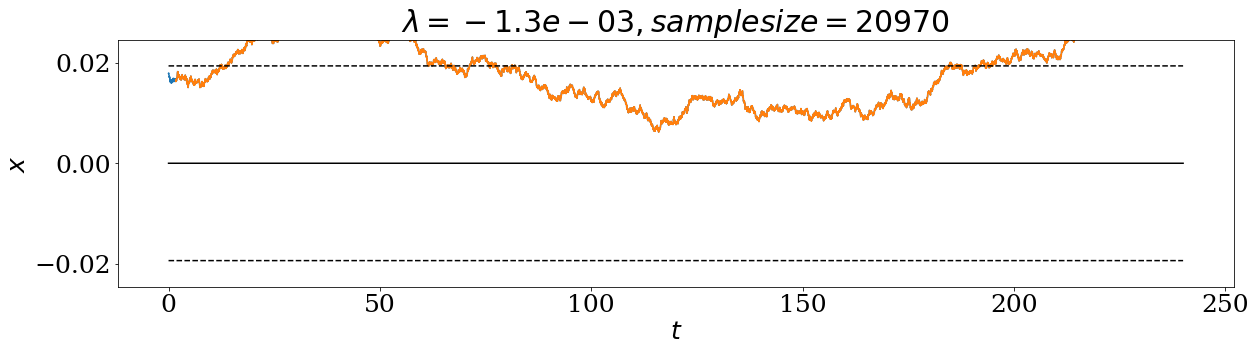

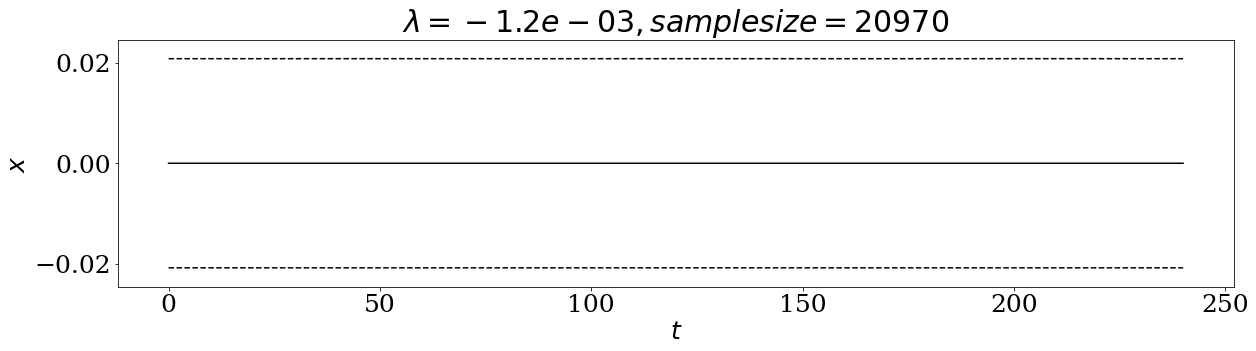

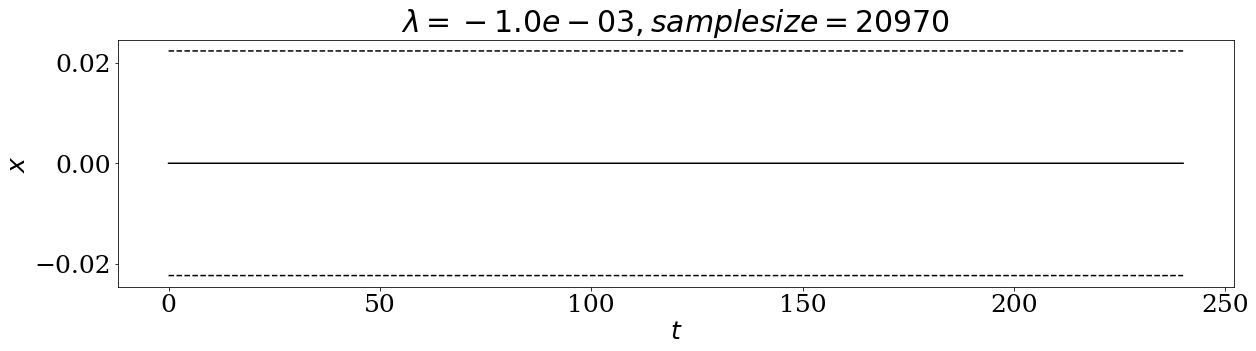

ValueError: Data has no positive values, and therefore can not be log-scaled.

In [38]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

s=0.001 #noise process intensity

l0=-1.1 #Initial lambda
lf=-0.001 #Final lambda
l_var=-np.logspace(np.log(-l0),np.log(-lf),50,base=np.e)
l=l_var[0]

def f(x, t):
    #X=x[0]. dot(x)=rx-x^3
    #r=x[1]. dot(r)=cte.  This is a constant swipe of parameter r at speed dot(r). 
    A=np.array([ l*x[0]+x[0]**3 ])
    return A
def G(x, t):
    #B=[ 'noise in x'         0    ]
    #  [      0        'noise in r']
    #the only parameter with relevant aditive noise is X(t) in this case. 
    B = np.diag([s]) # diagonal, so independent driving Wiener processes
    return B  


np.random.seed(1) #set numpy.random seed for reproducibility whenever it might be used.

t_rm=np.abs(1/l0)
t_threshold=t_rm/2
dt=t_threshold/4

t_win=t_rm/dt ### lendth of correlation. 

datalen=dt/10

t_final=np.max([800*datalen,t_win*30]) ##400 correlations lenghts to recover the good data.
tspan=np.arange(0,t_final,datalen)
print(datalen)
print(r'$\Delta t= $', tspan[1]-tspan[0], 't_final:', t_final)
print('data length: ', len(tspan))

######################## pre-set varaibles ###############################
dlen=len(l_var)
mean=np.zeros([dlen])
var=np.zeros([dlen])
skew=np.zeros([dlen])
kur=np.zeros([dlen])
hogg2=np.zeros([dlen])
moors=np.zeros([dlen])
RTW=np.zeros([dlen])
ac1=np.zeros([dlen])
ac2=np.zeros([dlen])

mean_b=np.zeros([dlen,2])
var_b=np.zeros([dlen,2])
skew_b=np.zeros([dlen,2])
kur_b=np.zeros([dlen,2])
hogg2_b=np.zeros([dlen,2])
moors_b=np.zeros([dlen,2])
RTW_b=np.zeros([dlen,2])
ac1_std=np.zeros([dlen,2])
RTWh=np.zeros([dlen])
RTWl=np.zeros([dlen])
RTWh_b=np.zeros([dlen,2])
RTWl_b=np.zeros([dlen,2])

RTWc=np.zeros([dlen])+1j*np.zeros([dlen])
RTWc_b=np.zeros([dlen,2])+1j*np.zeros([dlen,2])



veq=np.abs(s**2/(2*l_var))
pltlim=np.sqrt(np.max(veq))    

############################################################ integrations #######################
#initial condition is random with the equilibrium variance so all points don't start toghether:
x0= np.array([np.random.normal(0.,np.sqrt(np.abs(s**2/(2*l))))]) 


for j in range(len(l_var)):
    l=l_var[j]

    def f(x, t): 
        A=np.array([ l*x[0]+x[0]**3 ])
        return A
    
    result = sdeint.stratHeun(f, G, x0, tspan)
    #np.array([0.]) ### fix update value

    x0=np.array([result[-1,0]])#update final value
    
    t_transit=150

    n_resample_case=500 #Bootstraping re-samples
    sample_perc=70 #Bootstraping percentile
    res=result[t_transit:-1,0]
    #single shot variance bootstraping
    vr_b = bts.boot_result(bts.blockbootstrap(np.var,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    var[j]= vr_b[0]
    var_b[j]=vr_b[1][0],vr_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(st.skew,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    skew[j]= sk_b[0]
    skew_b[j]=sk_b[1][0],sk_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(np.mean,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    mean[j]= sk_b[0]
    mean_b[j]=sk_b[1][0],sk_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(st.kurtosis,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    kur[j]= sk_b[0]
    kur_b[j]=sk_b[1][0],sk_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(metrics.RTW_max,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    RTW[j]= sk_b[0]
    RTW_b[j]=sk_b[1][0],sk_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(metrics.RTW_high,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    RTWh[j]= sk_b[0]
    RTWh_b[j]=sk_b[1][0],sk_b[1][1]
    sk_b = bts.boot_result(bts.blockbootstrap(metrics.RTW_low,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
    RTWl[j]= sk_b[0]
    RTWl_b[j]=sk_b[1][0],sk_b[1][1]
    RTWc=RTWh+1j*RTWl
    try:
        sk_b = bts.boot_result(bts.blockbootstrap(metrics.Hogg2,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
        hogg2[j]= sk_b[0]
        hogg2_b[j]= sk_b[1][0],sk_b[1][1]
        sk_b = bts.boot_result(bts.blockbootstrap(metrics.Moors,res,n_resample_case,rep=True,sd=1,perc=sample_perc)[0])
        moors[j]= sk_b[0]
        moors_b[j]= sk_b[1][0],sk_b[1][1]
    except:
        continue

        
    varwin=0.5
   # 15*t_win/t_final
    ts = ews.TimeSeries(data=res)  ### ews stats ### 
#    ts.detrend(method='Gaussian',bandwidth=varwin/2, span=varwin/2)
    ts.compute_auto(lag=1,rolling_window=varwin)
    ts.compute_auto(lag=2,rolling_window=varwin)
    ts.compute_var(rolling_window=varwin)
    ac_labels = [s for s in ts.ews.columns if s[:2]=='ac']
   # smooth=ts.state['smoothing'].values
    ac1[j]=np.nanmean(ts.ews[ac_labels[0]].values)
    ac2[j]=np.nanmean(ts.ews[ac_labels[1]].values)

    ac1_std[j]=np.sqrt(np.nanvar(ts.ews[ac_labels[0]].values)),np.sqrt(np.nanvar(ts.ews[ac_labels[0]].values))
    #ts.compute_ktau()

    var_ews=ts.ews['variance'].values

    fig=plt.figure(figsize=(20,10))
    fig.add_subplot(211)
    
    plt.title(r'$\lambda = %.1e, sample size = %.i$' %(l,len(tspan)-t_transit))
    plt.plot(tspan,result)
    plt.plot(tspan[t_transit:-1],res)
    plt.plot(tspan,0*tspan+np.sqrt(-s**2/(2*l)),'--',color='black')
    plt.plot(tspan,0*tspan-np.sqrt(-s**2/(2*l)),'--',color='black')
    plt.plot(tspan,0*result,'-',color='black')
    plt.ylabel('$x$')
    plt.xlabel('$t$')
    plt.ylim([-1.1*pltlim,1.1*pltlim ])


    fig=plt.figure(figsize=(20,10))
    fig.add_subplot(211)
    plt.plot(ts.ews[ac_labels[0]].values)
    fig.add_subplot(212)
    plt.hist(ts.ews[ac_labels[0]].values,bins=50)
    plt.ylabel('$x$')
    plt.xlim([0.5,1.1])
    fig.savefig(str('./skipping/lags/%.3i' %(j))+'lag_1.png'  , dpi = 100)# when saving, specify the DPI\n",
    plt.close(fig)  

    print('lambda: ', l)

   #Mac=-(ac1-1)/dt
#vac=-var_ews/(ac1-1)
#Mvar=-s**2/(2*var)

##################################### print stats ##############################################    
fig, ax = plt.subplots(10, 1, sharex='col',figsize=(20,22))
plt.rc('font',size=25)

#plt.subplots(2)
axs=ax[0]
axs.set_title(r'$\lambda_{min} = %.1e, $sample size $= %.i$' %(l,len(tspan)-t_transit))
axs.plot(l_var,mean,'o',label='mean')
axs.set_ylabel('Mean')
axs.fill_between(l_var, mean_b[:,0], mean_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.plot(l_var,0*veq,'--',color='black')
axs=ax[6]
axs.plot(l_var,var,'o',color=CB_color_cycle[1],label='Variance')
axs.fill_between(l_var, var_b[:,0], var_b[:,1], color=CB_color_cycle[1], alpha=.4)
axs.plot(l_var,veq,'--',color='black')
axs.set_ylabel('Variance')
axs.set_ylim([0,0.01])
axs=ax[5]
axs.plot(l_var,skew,'o',label='skewness')
axs.fill_between(l_var, skew_b[:,0],skew_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel('Skewness')
axs=ax[4]
axs.plot(l_var,kur,'o',label='Kurtosis')
axs.fill_between(l_var, kur_b[:,0], kur_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel('Kurtosis')
axs=ax[7]
axs.plot(l_var,ac1,'o', color=CB_color_cycle[2],label='Mean Autocorrelation')
axs.fill_between(l_var, ac1+ac1_std[:,0], ac1-ac1_std[:,1], color=CB_color_cycle[2], alpha=.4)
axs.plot(l_var,np.exp(-l_var*dt),'--',color='black',label='Lag-1')
axs.set_ylabel('Lag$_1$')
axs=ax[8]
axs.plot(l_var,-(ac1-1)/dt,'o', color=CB_color_cycle[2],label='M=(Lag$_1$-1)/dt')
axs.plot(l_var,l_var,'--',color='black',linewidth=2)
axs.fill_between(l_var, -(ac1+ac1_std[:,0]-1)/dt, -(ac1-ac1_std[:,1]-1)/dt, color=CB_color_cycle[2], alpha=.4)
axs.plot(l_var,s**2/(2*var),'o',color=CB_color_cycle[1],label='$M=\sigma^2/2Var$')
axs.fill_between(l_var, s**2/(2*var_b[:,0]), s**2/(2*var_b[:,1]), color=CB_color_cycle[1], alpha=.4)
axs.legend(loc="upper right")
axs.set_ylabel(r'$M$')
#plt.legend()
axs=ax[1]
axs.plot(l_var,RTW,'o',label='RTW')
axs.fill_between(l_var, RTW_b[:,0],RTW_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel(r'RTW')
axs=ax[3]
axs.plot(l_var,hogg2,'o',label='RTW')
axs.fill_between(l_var, hogg2_b[:,0],hogg2_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel(r'Hogg')
axs=ax[2]
axs.plot(l_var,moors,'o',label='kur3')
axs.fill_between(l_var, moors_b[:,0],moors_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel(r'Moors')
axs=ax[9]
axs.plot(l_var,-var/(ac1-1),'o', color=CB_color_cycle[3],label='M=(Lag$_1$-1)/dt')
axs.set_ylabel('Var/(Lag$_1$-1)')
axs.set_yscale('log')

for xx in ax:
    yl=xx.get_ylim()
    xx.plot([0,0],yl,'-',color='gray',linewidth=4)
    xx.set_xlim([min(l_var),3.01])
axs.set_xscale('log')
axs.set_xlabel('$\lambda$')
plt.rc('font',size=25)

fig.savefig(str('./skipping/')+'stats.png'  , dpi = 200,bbox_inches='tight')# when saving, specify the DPI\n",

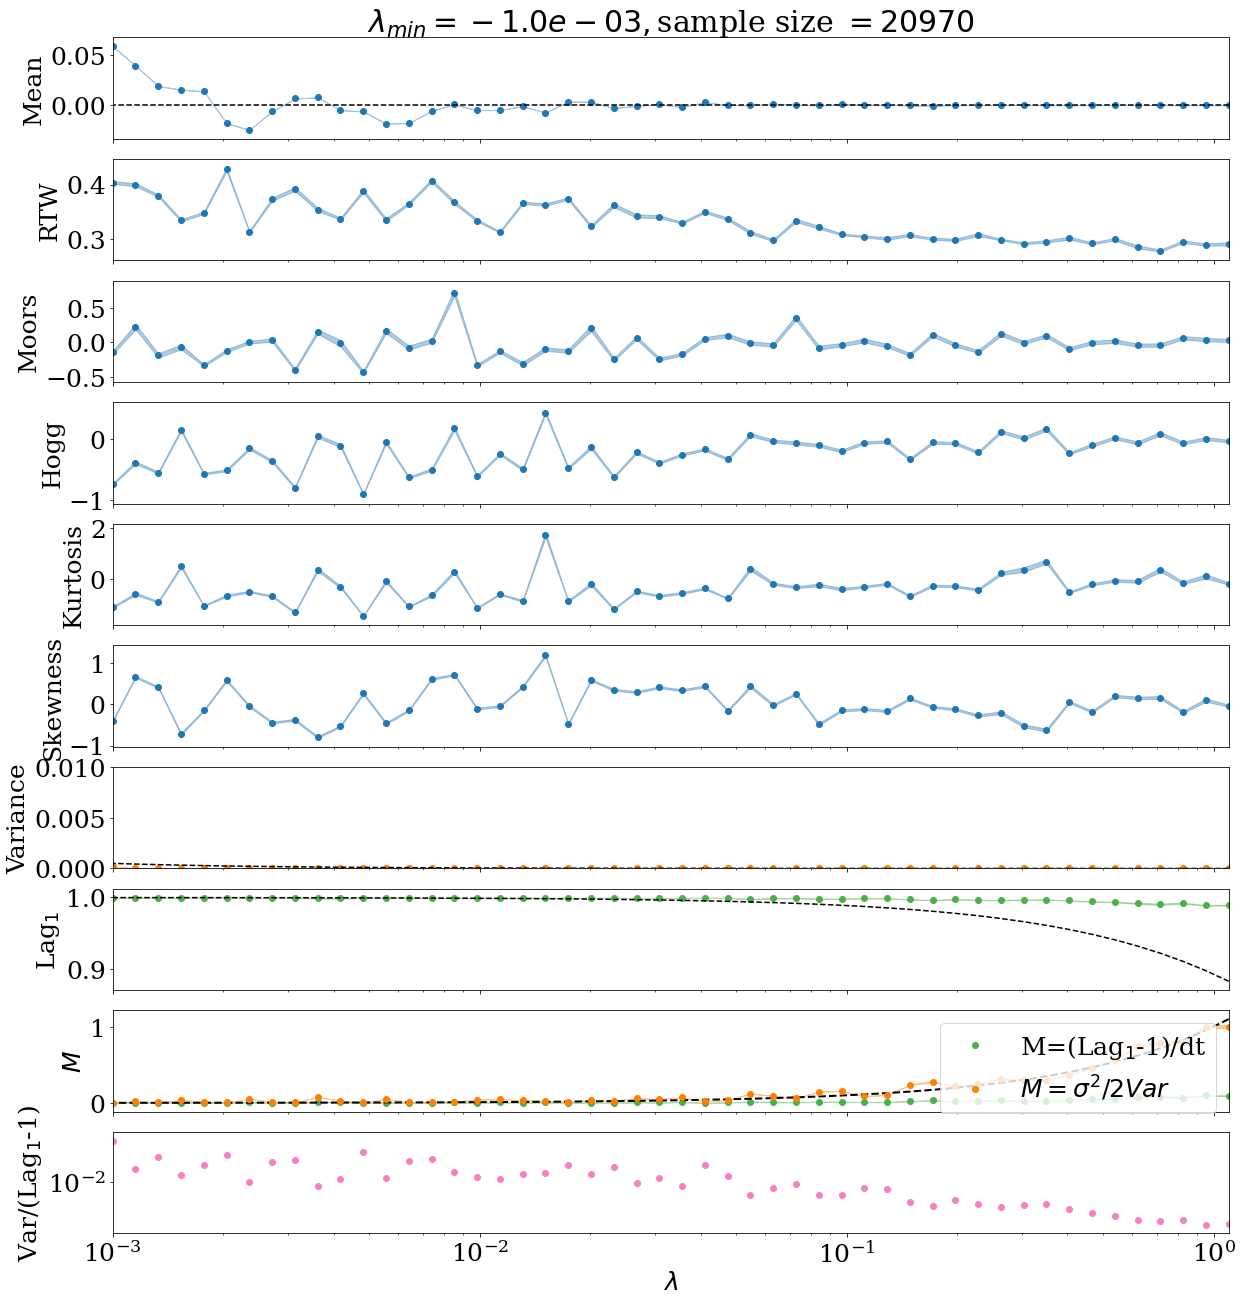

In [39]:
##################################### print stats ##############################################    
fig, ax = plt.subplots(10, 1, sharex='col',figsize=(20,22))
plt.rc('font',size=25)
l_var=-l_var
#plt.subplots(2)
axs=ax[0]
axs.set_title(r'$\lambda_{min} = %.1e, $sample size $= %.i$' %(l,len(tspan)-t_transit))
axs.plot(l_var,mean,'o',label='mean')
axs.set_ylabel('Mean')
axs.fill_between(l_var, mean_b[:,0], mean_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.plot(l_var,0*veq,'--',color='black')
axs=ax[6]
axs.plot(l_var,var,'o',color=CB_color_cycle[1],label='Variance')
axs.fill_between(l_var, var_b[:,0], var_b[:,1], color=CB_color_cycle[1], alpha=.4)
axs.plot(l_var,veq,'--',color='black')
axs.set_ylabel('Variance')
axs.set_ylim([0,0.01])
axs=ax[5]
axs.plot(l_var,skew,'o',label='skewness')
axs.fill_between(l_var, skew_b[:,0],skew_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel('Skewness')
axs=ax[4]
axs.plot(l_var,kur,'o',label='Kurtosis')
axs.fill_between(l_var, kur_b[:,0], kur_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel('Kurtosis')
axs=ax[7]
axs.plot(l_var,ac1,'o', color=CB_color_cycle[2],label='Mean Autocorrelation')
axs.fill_between(l_var, ac1+ac1_std[:,0], ac1-ac1_std[:,1], color=CB_color_cycle[2], alpha=.4)
axs.plot(l_var,np.exp(-l_var*dt),'--',color='black',label='Lag-1')
axs.set_ylabel('Lag$_1$')
axs=ax[8]
axs.plot(l_var,-(ac1-1)/dt,'o', color=CB_color_cycle[2],label='M=(Lag$_1$-1)/dt')
axs.plot(l_var,l_var,'--',color='black',linewidth=2)
axs.fill_between(l_var, -(ac1+ac1_std[:,0]-1)/dt, -(ac1-ac1_std[:,1]-1)/dt, color=CB_color_cycle[2], alpha=.4)
axs.plot(l_var,s**2/(2*var),'o',color=CB_color_cycle[1],label='$M=\sigma^2/2Var$')
axs.fill_between(l_var, s**2/(2*var_b[:,0]), s**2/(2*var_b[:,1]), color=CB_color_cycle[1], alpha=.4)
axs.legend(loc="upper right")
axs.set_ylabel(r'$M$')
#plt.legend()
axs=ax[1]
axs.plot(l_var,RTW,'o',label='RTW')
axs.fill_between(l_var, RTW_b[:,0],RTW_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel(r'RTW')
axs=ax[3]
axs.plot(l_var,hogg2,'o',label='RTW')
axs.fill_between(l_var, hogg2_b[:,0],hogg2_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel(r'Hogg')
axs=ax[2]
axs.plot(l_var,moors,'o',label='kur3')
axs.fill_between(l_var, moors_b[:,0],moors_b[:,1], color=CB_color_cycle[0], alpha=.4)
axs.set_ylabel(r'Moors')
axs=ax[9]
axs.plot(l_var,-var/(ac1-1),'o', color=CB_color_cycle[3],label='M=(Lag$_1$-1)/dt')
axs.set_ylabel('Var/(Lag$_1$-1)')
axs.set_yscale('log')

for xx in ax:
    yl=xx.get_ylim()
    xx.plot([0,0],yl,'-',color='gray',linewidth=4)
    xx.set_xlim([min(l_var),max(l_var)])
axs.set_xscale('log')
axs.set_xlabel('$\lambda$')
plt.rc('font',size=25)

fig.savefig(str('./skipping/')+'stats.png'  , dpi = 200,bbox_inches='tight')# when saving, specify the DPI\n",